# Lab Week 3

## EOSC 211

**Learning Objectives:**  
1. Take a real world problem in EOAS and think of it like a scientific programmer
2. Apply our knowledge of *Python* data types, indexing, slicing arrays
3. Use built in functions and imported packages
4. Generate a scientific figure with Matplotlib
5. Reverse-engineer someone else's code so make it work for you

## Scientific Figure Checklist

* Title
* X and Y axis labels with units
* Legend (if needed to interpret data)
* Does the figure *make sense* just by looking at it? (does it need an outside explanation?)
* Does it *look good*?

## Exercise 1: Visualize some oceanographic data from the web

get data from here https://oceancolor.gsfc.nasa.gov

link -> data -> level 3 browser -> drop down settings to "standard", "<any>", <any>", "monthly", "9km" -> right click -> save image as -> name it something sensible and save in working directory
    
mine is at `C:\Users\Owner\UBC_TLEF\eosc_211\e211_python_2021\wk03\lab_wk3\chlorophyl_march1999.png`
    


Import the packages we need (explain what each one does)

In [1]:
# Import the necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import our data as a .png image

In [2]:
# load the image
chlordat_in = Image.open("chlorophyl_march1999.png")

# what type of data are we dealing with? use the built in function type()
type(chlordat_in)

PIL.PngImagePlugin.PngImageFile

png is a common image format, but we would like to do more than just look at the picture. Convert to numpy so we can do analyze our data and generate a proper *scientific figure* to present our results.

In [3]:
chlordat_arr = np.asarray(chlordat_in)

# now what is the data type?
type(chlordat_arr)
chlordat_arr.dtype

dtype('uint8')

In [4]:
# cool, we made it into a numpy array. What are its dimensions?
np.shape(chlordat_arr)

(2160, 4320)

What are the *values* stored in our array? chlorophyl concentrations from 0 - 20 mg/m3 are mapped to integers from 255 to 0. Discuss further as in the old lab

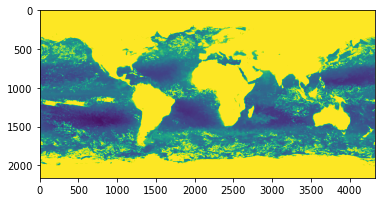

In [14]:
pcm = plt.imshow(chlordat_arr,origin='upper')

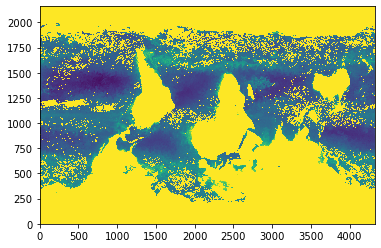

In [5]:
# lets try plotting our array as a pcolormesh (a common way to visualize 2D datasets or images)
pcm = plt.pcolormesh(chlordat_arr)

Okay, we seem to have the general features of our data, but something has gone awry converting from a 
png to an array. How can we fix this given what we know about *array slicing?*

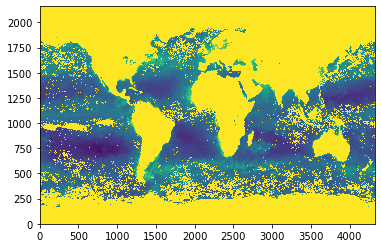

In [6]:
chlordat_fixed = chlordat_arr[::-1,::]  # explain what this does, or get students to come up with this

# try plotting it again
pcm = plt.pcolormesh(chlordat_fixed)

Looking better, but the default colours hurt to look at and it's very hard to understand what this picture actually represents. We can look at the available *parameters* ( ways we can modify the figure) for a *pcolormesh* plot by doing

In [7]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--

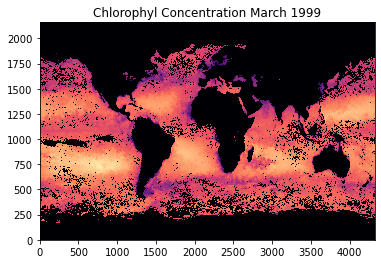

In [8]:
pcm = plt.pcolormesh(chlordat_fixed, cmap='magma_r') # change the colormap with a keyword argument
plt.title("Chlorophyl Concentration March 1999"); # add a title to the figure

Here is a link to the [matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html) where I got the `magma_r` colormap from (you can add `_r` to any color map to reverse it). 

Next: change the x and y labels to something something meaningful, like latitude and longitude.

In [9]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this

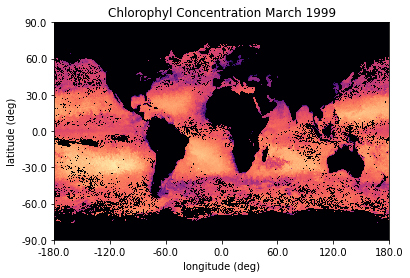

In [10]:
# We'd like to label every 30 degrees and place them in the correct location on our image.
# Use our skills at creating, indexing and slicing numpy arrays to create "ticks" and "labels"

numlats = np.shape(chlordat_fixed)[0]  # how many latitude elements in the original image?
numlons = np.shape(chlordat_fixed)[1]  # how many longitude elements?

# create arrays to use as "ticks"
lat_ticks = np.linspace(0, numlats, 7) # what am i doing here?
lon_ticks = np.linspace(0, numlons, 7)

# create arrays to use as "labels"
lat_labels = np.linspace(-90, 90, 7)  # start, stop, number of elements
lon_labels = np.linspace(-180, 180, 7)


# plot it again with lat, lon ticks and labels
pcm = plt.pcolormesh(chlordat_fixed, cmap="magma_r")  # change the colormap with a keyword argument
plt.title("Chlorophyl Concentration March 1999")  # add a title to the figure
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(lon_ticks, lon_labels)
plt.yticks(lat_ticks, lat_labels);

Add a colourbar so we can interpret our data, just like the one on the oceancolor website. 

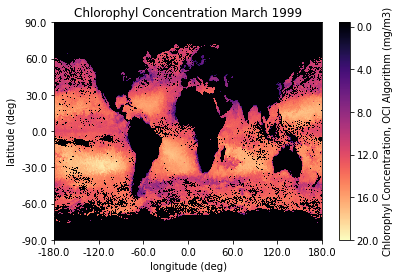

In [11]:
pcm = plt.pcolormesh(chlordat_fixed, cmap="magma_r")
plt.title("Chlorophyl Concentration March 1999")  # add a title to the figure
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(lon_ticks, lon_labels)
plt.yticks(lat_ticks, lat_labels)

# create the colorbar. ticks and labels are assigned much the same as with axis labels
cbar = plt.colorbar(pcm, ticks=np.linspace(250,0,6), label="Chlorophyl Concentration, OCI Algorithm (mg/m3)")
cbar.ax.set_yticklabels(np.linspace(0,20,6));

Go through our scientific figure checklist. This checks all the boxes. 9 lines of code to produce the plot. It might be a good idea to save this code somewhere to use as a reference for the next time you need to generate a scientific figure.

## Exercise 2: Bathymetry

The old lab talks about processing unscaled vs scaled data, but we just did a ton of work to rescale our labels in question 1. Whats easy in matlab is hard in python and v.v?


Same idea as #1: get data, re-format it into something we can understand and parse with python, manipulate the data however we wish, then present the result in a concise, nicely formatted way.

This dataset is from old MATLAB code, which saves data using the `.mat` extension. A quick search shows that there is a python package called `loadmat` from the scipy library that will handle this file type

In [12]:
# import tools we need to process the new data type
from scipy.io import loadmat

help(loadmat)

Help on function loadmat in module scipy.io.matlab.mio:

loadmat(file_name, mdict=None, appendmat=True, **kwargs)
    Load MATLAB file.
    
    Parameters
    ----------
    file_name : str
       Name of the mat file (do not need .mat extension if
       appendmat==True). Can also pass open file-like object.
    mdict : dict, optional
        Dictionary in which to insert matfile variables.
    appendmat : bool, optional
       True to append the .mat extension to the end of the given
       filename, if not already present.
    byte_order : str or None, optional
       None by default, implying byte order guessed from mat
       file. Otherwise can be one of ('native', '=', 'little', '<',
       'BIG', '>').
    mat_dtype : bool, optional
       If True, return arrays in same dtype as would be loaded into
       MATLAB (instead of the dtype with which they are saved).
    squeeze_me : bool, optional
       Whether to squeeze unit matrix dimensions or not.
    chars_as_strings : bool

In [13]:
# get data
#bathyfile = loadmat("Bathyfile.mat")

# format data into something we can use
# loadmat outputs a dictionary of np arrays. This code extracts the dictionary values to variables
#lon = bathyfile["bath"][0][0][0].flatten() # extract latitude array
#lat = bathyfile["bath"][0][0][1].flatten() # extract longitude array
#height = bathyfile["bath"][0][0][2]
#height = height[::-1] # flip it over as with q1

# present data
#pcm = plt.pcolormesh(height,cmap='BuGn')
#plt.xticks(np.arange(len(lon))[::200], np.round(lon)[::200])
#plt.yticks(np.arange(len(lat))[::50], np.round(lat)[::50]);

## Exercise 3: 

do the question from the old matlab-lab in python and work backwards from there. The question:

You NEED NOT hand in EVERYTHING you have done. Instead, you must gather together the relevant bits of
code you have already written and write and hand in a script file called (exactly) lab3.m which will do EXACTLY
the following (no less and no more):

    (1) load the file Bathyfile.mat

    (2) load the file salt.txt, and extract its data into a structure

    (3) Make a plot with axis labels and a title showing contours of salinity (as a function of longitude and depth).Use contourf

    (4) Overplot on it lines showing bathymetry (heights and depths) as a function of longitude at 48"N, 51.5"N, and 55"N latitudes.

    (5) lab3.m should also contain the following (and exactly the following) lines of working code:

        partner.name='YYYYYY';
        Time_spent= XX;

where YYYYYY (string) is the person with whom you were paired in the labs (remember to put single quotes
around the name) and and XX (number) is your estimate of the number of hours spent both in the scheduled lab
period and outside it to complete this lab.

It is important to follow these instructions because your code will be semi-automatically “run-tested” by a program
that expects your code to follow these specifications.

Hint: To make sure your script works after adding the partner info - save, quit Matlab, restart Matlab, and type
lab3 at the command line.

In [14]:
# get bathymetry data
bathyfile = loadmat("Bathyfile.mat") 
# loadmat outputs a dictionary of np arrays. This code extracts the dictionary values to variables
bath_lon = bathyfile["bath"][0][0][0].flatten() # extract latitude array
bath_lat = bathyfile["bath"][0][0][1].flatten() # extract longitude array
bath_height = bathyfile["bath"][0][0][2] # extract height, depth and flip it over
bath_height = bath_height[::-1]
bath_lat = bath_lat[::-1] # image is flipped over on the lat axis, fix height and lat variables

# quick plot to visualize our data and make sure the import worked properly (ie not upside down or something...)
#plt.contourf(bath_lon, bath_lat, bath_height);

In [15]:
# the question asks for slices at 48"N, 51.5"N and 55"N. do some slicing!

# first find out where these elements are
np.where(bath_lat==48.0), np.where(bath_lat==51.5), np.where(bath_lat==55.0) # we havent covered this in lecture...

((array([30], dtype=int64),),
 (array([135], dtype=int64),),
 (array([240], dtype=int64),))

In [16]:
# create new 1D np arrays to store the slices of constant latitude
bath480 = bath_height[30]
bath515 = bath_height[135]
bath550 = bath_height[240]

In [17]:
# get the salt data
salt = np.loadtxt("salt.txt")
salt_lon = salt[0,1:]
salt_depth = salt[1:,0]
salt_conc = salt[1:,1:]

# again, quick and dirty plot as a sanity check. Why is the rhs blank? (its land)
#plt.contourf(salt_lon, salt_depth, salt_conc)

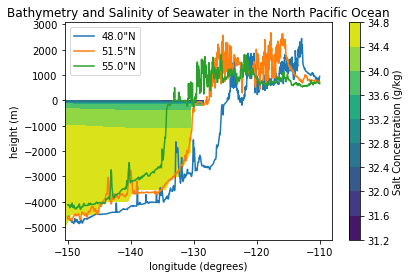

In [18]:
# make the final pretty plot
fig, ax = plt.subplots()
con=ax.contourf(salt_lon, salt_depth, salt_conc)
cbar = plt.colorbar(con, label="Salt Concentration (g/kg)")
ax.plot(bath_lon, bath480, label='48.0"N')
ax.plot(bath_lon, bath515, label='51.5"N')
ax.plot(bath_lon, bath550, label='55.0"N')
ax.legend()

ax.set_title('Bathymetry and Salinity of Seawater in the North Pacific Ocean')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('height (m)');